## **Quantum Entanglement**

In this notebook, we shall learn to entangle two Qubits and create 4 Bell States using the python library Qiskit. The circuit used for demonstration of Quantum Entanglement is simple and therefore, this notebook is a great way for a beginner to get into the World of Quantum Computing using Qiskit.

**Prerequisites:**

* Basic Python

The Notebook is developed using the Google Colab. Therefore, if it is run in any other environment(like on a local machines), some steps may vary. However, the notebook can be executed easily in the Google Colab Environment without any changes.

# What is Qiskit?

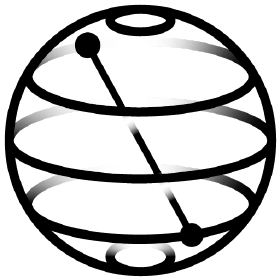



**Image credits: Qiskit-Github**

[Qiskit](https://qiskit.org/) is an open-source framework for Quantum Computing. It provides tools for creating and manipulating quantum programs and running them on prototype quantum devices on IBM Q Experience or on simulators on a local computer.

The version of Qiskit that we will be using is based on Python. The Swift and Javascript Versions of Qiskit are also in Development

Essentially, we will be building a Quantum Circuit that works on Qubits (Quantum Analogue of Classical bits). 

# Quantum Gates

Quantum Gates are the most important part of a Quantum Circuit. We manipulate the state of Qubits by applying Quantum Gates on them. This is similar to a Classical Circuit where we use Classical Gates like AND, OR, NOT, NAND, etc. for the purpose of manipulation. Some of the Quantum Gates have a classical analogue (like Quantum NOT Gate) and some are completely new gates with no classical analogues(like Hadamard Gate).

In the Quantum Entanglement Circuit, we will be using two gates:
* CNOT Gate
* Hadamard Gate

**CNOT Gate:**

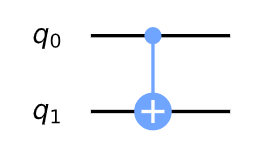

**Image Credits: qiskit.org/textbook**

The CNOT Gate is one of the most commonly used gates in Quantum Circuits. It is the Quantum Analogue of the Classical XOR Gate. It operates on two Qubits namely, the control Qubit and the Target Qubit. The function of the Gate is simple! If the Control Qubit is in the state |1>, the CNOT Gate performs a NOT on the Target Qubit i.e it flips its state from |0> to |1> or from |1> to |0>. In the image above, the Control Qubit is denoted by **q0** and the Target Qubit is denoted by **q1**.

Here, **"|>"** are a part of Dirac Notation and they distiguish the state of a Qubit from the state of a classical bit. They are pronounced as 'Ket'. For eg: |0> can be read out as "Ket Zero" or "Ket of Zero". As we know, the classical bit can take the values of either 0 or 1. Similarly, the Qubits can take either the state |0> or the state |1> or both at the same time(this is just a linear combination of these two states, popularly known as the concept of Superposition)

Also, it is important to note that |0> and |1> are both 2X1 Vectors and not a scalar value.

In [1]:
import numpy as np
zero_state = np.array([[1],[0]])
one_state = np.array([[0],[1]])

In [2]:
print("The |0> is \n", zero_state)
print("The |1> is \n", one_state)

The |0> is 
 [[1]
 [0]]
The |1> is 
 [[0]
 [1]]


In [3]:
print("The shape of the Vector |0> is",zero_state.shape)
print("The shape of the Vector |1> is",one_state.shape)

The shape of the Vector |0> is (2, 1)
The shape of the Vector |1> is (2, 1)


* At this point, a good question can be why is |0> equal to [[1],[0]]?

The Question has a simple answer. There are two possible states 0 and 1. The value 1 on the first place indicates that it's the state zero. Similarly, in the state |1>, the value 1 is on the second position, indicating the state one. This is similar to the concept of **One-Hot Encoding**.

**Hadamard Gate:**

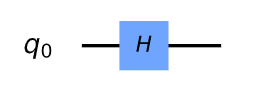

**Image Credits: qiskit.org/textbook**

The Hadamard is a unique quantum gate and it transforms the state |0> to (|0>+|1>)/sqrt(2) and |1> to (|0>-|1>)/sqrt(2). Alternatively, this can be thought of as a 90 degree rotation around Y-Axis followed by a 180 degree rotation around X axis of the [Bloch Sphere](https://en.wikipedia.org/wiki/Bloch_sphere).




**Note:** Quantum Gates can be represented using a Unitary Matrix.

The Unitary Matrix for CNOT and Hadamard Gates also exist. 

**For CNOT Gate:**

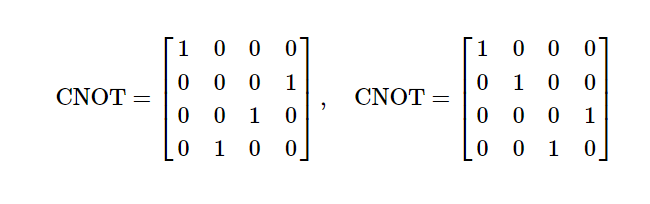



**For Hadamard Gate:**



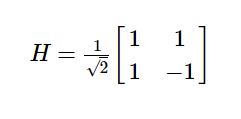

# What is Quantum Entanglement?

Before getting into the coding, it is important to undestand what do we mean by the concept of Quantum Entanglement? This concept of Quantum Entanglement is one of the most important concepts in Quantum Mechanics and it was a topic of 
huge debate between Neil Bohr and Albert Einstein.

The Principle states that two quantum particles, when entangled, can communicate with each other instantly irrespective of the distance between them. This means that if we place one qubit from the entangled pair on one edge of the Observable Universe and the other qubit on the other edge, they can still communicate. In simple words, this violates the law of General Theory of Relativity which states that faster than light communication or travel is not possible. Albert Einstein named this concept of Entanglement as "Spooky Action at a distance".

With resect to Quantum Computing, the idea can be explained as, "if you measure one qubit from the entangled pair, you instantly know the state of the second qubit".

In this notebook, we will develop four entangled States(also popularly known as [Bell States](https://en.wikipedia.org/wiki/Bell_state)) using two Qubits.

The four Bell States are:

(Image Credits: Wikipedia)

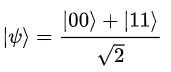

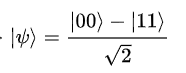

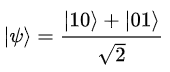

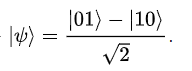

**Note:**

Here, two zeros in the notation |00> indicate the states of two Qubits.

# Quantum Circuits for Entanglement

Before we can use qiskit, we need to install the Qiskit in the Colab. If you want to install qiskit on your local machine, you can go through this [video](https://www.youtube.com/watch?v=M4EkW4VwhcI).

In [4]:
!pip install qiskit #Install qiskit on colab
!pip install pylatexenc #Required for matplotlib support to render the images of circuit
from IPython.display import clear_output #Clear the output after installation
clear_output()

Now, this is the time to get into the cool coding part!

We shall build the first Entangled State.

**The First Bell State:**

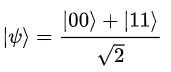

In [42]:
#QuantumCircuit is the class that we shall use for our circuit
#Aer is required to get the required backend support
#execute will execute our circuit
from qiskit import QuantumCircuit, Aer, execute

In [43]:
circuit_es1 = QuantumCircuit(2,2) #initializing our circuit with two qubits and two bits

In [44]:
circuit_es1.h(0) #Applying hadamard Gate on the first qubit
circuit_es1.cx(0,1) #Applying the CNOT Gate with zeroth qubit as the control qubit 
                    #and the first qubit as the target qubit
circuit_es1.measure(0,0) #Measuring the zeroth qubit and storing its output to zeroth bit
circuit_es1.measure(1,1)

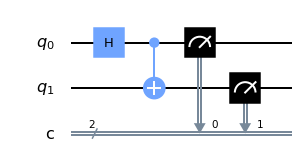

In [45]:
#Let's visualize our circuit
circuit_es1.draw('mpl')

The only part of the circuit that we have not discussed yet is the **measurement**. 

The "Measurement" is also considered as an operation in Quantum Computing. In fact, a measurement is the only way to extract output from a qubit. Here, we extract the output from the qubit and store it in a bit.


In [46]:
simulator = Aer.get_backend('qasm_simulator') #Using qasm_simulator, we can simulate our circuit on an actual quantum device
result = execute(circuit_es1,backend=simulator, shots = 1024).result() #shots = number of time we want to execute the circuit

In [47]:
counts = result.get_counts() #Get the results for each simulation

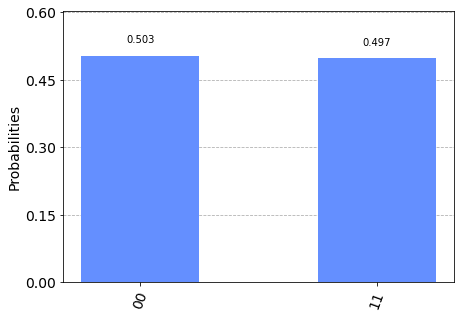

In [48]:
from qiskit.visualization import plot_histogram #To visualize our results
plot_histogram(counts)

**Analyzing the results:**

* Clearly, we have got two states |00> and |11> with the right most number representing the state of the zeroth qubit. The probability of getting the state |00> is 0.503 and for |11>, it's 0.497

* Note that we can never get the state (|00>+|11>)/sqrt(2). As soon as we measure a qubit, the superposition state vanishes away and we get either |00> or |11>

* Initially, all the qubits are in the |0> state. Therefore, initially before applying the Hadamard Gate, our circuit was in the state |00>. We transformed that state into the (|00>+|11>)/sqrt(2) state. However, after measurement we can either get |00> or |11>.



**How does the state transformation take place?**

* The Hadamard Gate transforms the state of the first qubit from state |0> to (|0>+|1>)/sqrt(2). Therefore, our two qubit circuit is in the state (|00>+|01>)/sqrt(2). The right most digit defines the state of zeroth qubit. 

* After the Hadamard Gate, we apply the CNOT Gate. Recall that the CNOT Gate performs a NOT on the target qubit if the control qubit is in the state |1>. Clearly, the CNOT Gate has no effect if the state is |00>. However, if the state is |01>, the NOT operation is performed and the |01> state is transformed to |11>. 

* Now, we finally achieve the state (|00>+|11>)/sqrt(2). However, the state collapses before we make a measurement and therefore, we either get |00> or |11>

**Note**: For the next three Bell States, try to figure out yourself the state transformation process as a simple exercise.

**The Second Bell State:**

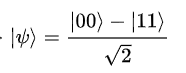

Before we start building the circuit for Second Bell state, a common question can be - "Why do these 4 Bell States differ?"

The reason for the differences in the Bell States is the initial state. Each of the four Bell State has a different initial state.

Bell State 1 - |00>

Bell State 2 - |01>

Bell State 3 - |10>

Bell State 4 - |11>

Therefore, the circuit for all the Bell States is the same. We only need to change the initial states of our qubits.

In [52]:
circuit_es2 = QuantumCircuit(2,2)
circuit_es2.x(0) #Applying the NOT Gate on the first qubit to get the state |01>
circuit_es2.h(0) 
circuit_es2.cx(0,1)
circuit_es2.measure(0,0) 
circuit_es2.measure(1,1)

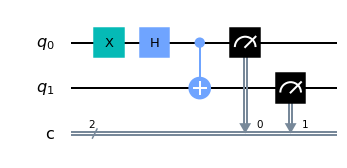

In [53]:
#Let's visualize our circuit
circuit_es2.draw('mpl')

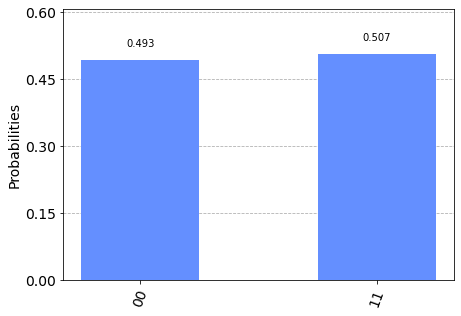

In [54]:
simulator = Aer.get_backend('qasm_simulator') 
result = execute(circuit_es2,backend=simulator, shots = 1024).result() 
counts = result.get_counts()
plot_histogram(counts)

**The Third Bell State:**

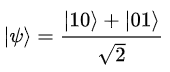

In [55]:
circuit_es3 = QuantumCircuit(2,2)
circuit_es3.x(1) #Applying the NOT Gate on the second qubit to get the state |10>
circuit_es3.h(0) 
circuit_es3.cx(0,1)
circuit_es3.measure(0,0) 
circuit_es3.measure(1,1)

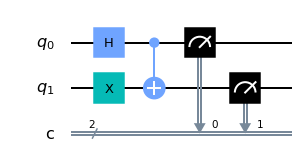

In [56]:
#Let's visualize our circuit
circuit_es3.draw('mpl')

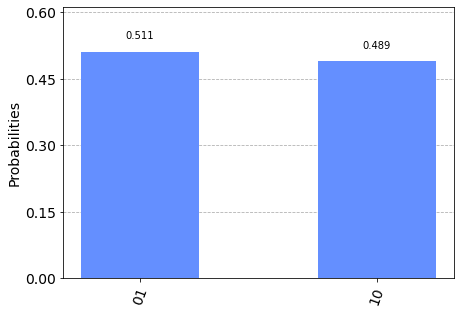

In [57]:
simulator = Aer.get_backend('qasm_simulator') 
result = execute(circuit_es3,backend=simulator, shots = 1024).result() 
counts = result.get_counts()
plot_histogram(counts)

**The Fourth Bell State:**

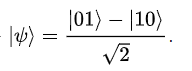

In [58]:
circuit_es4 = QuantumCircuit(2,2)
circuit_es4.x(0)
circuit_es4.x(1) #Applying the NOT Gates on the two qubits to get the state |11>
circuit_es4.h(0) 
circuit_es4.cx(0,1)
circuit_es4.measure(0,0) 
circuit_es4.measure(1,1)

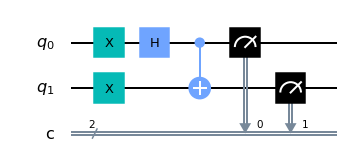

In [59]:
#Let's visualize our circuit
circuit_es4.draw('mpl')

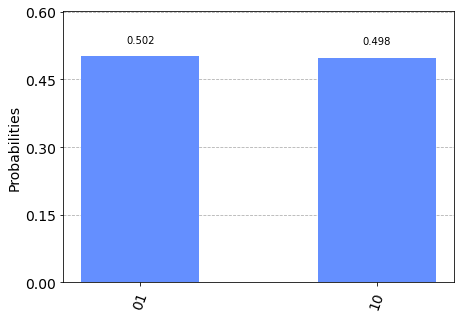

In [60]:
simulator = Aer.get_backend('qasm_simulator') 
result = execute(circuit_es4,backend=simulator, shots = 1024).result() 
counts = result.get_counts()
plot_histogram(counts)

If you find something incorrect in the notebook or feel that some concepts needed a better explaination or you need resources for better understanding, contact me on [LinkedIn](https://www.linkedin.com/in/jay-shah-mlpython/).



**THANK YOU!**